# Learn GeoPandas

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [4]:
world.shape

(177, 6)

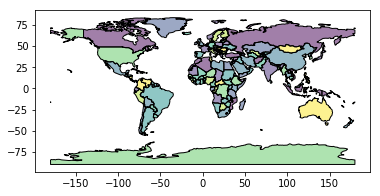

In [5]:
world.plot()

In [6]:
world.geometry.name


'geometry'

In [7]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

'borders'

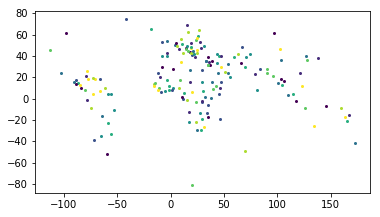

In [8]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot()

In [9]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

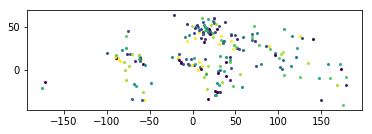

In [10]:
cities.plot()

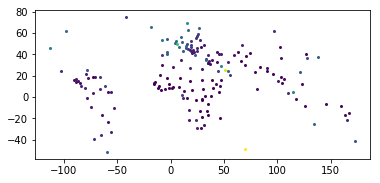

In [11]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

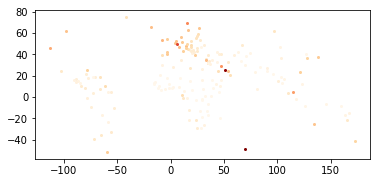

In [12]:
world.plot(column='gdp_per_cap', cmap='OrRd')

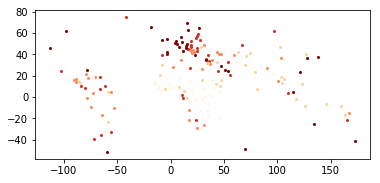

In [13]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

### Maps with Layers

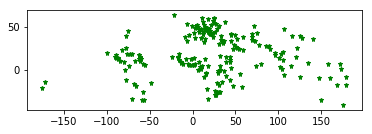

In [14]:
cities.plot(marker="*", color='green', markersize=5)

In [15]:
cities = cities.to_crs(world.crs)

#### Method 1

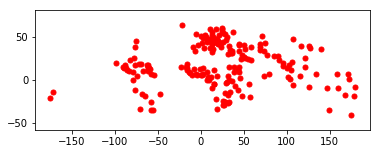

In [16]:
base = world.plot(color='white')
cities.plot(ax=base, marker='o', color='red', markersize=5)

#### Method 2

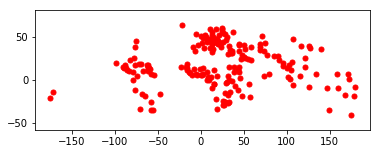

In [17]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

world.plot(ax=ax, color='white')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

### Re-Projecting

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [23]:
world.crs

{'init': 'epsg:4326'}

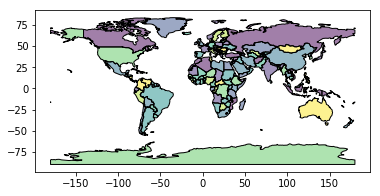

In [24]:
world.plot()

In [25]:
world = world[(world.name != 'Antarctica') & (world.name != 'Fr. S. Antarctic Lands')]

In [27]:
world = world.to_crs({'init': 'epsg:3395'})

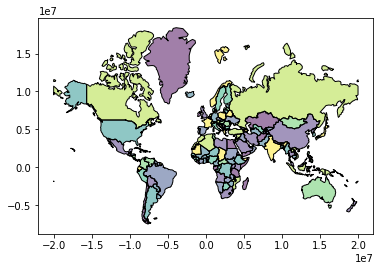

In [28]:
world.plot()

### Geometric Manipulations

In [32]:
from shapely.geometry import Polygon

In [35]:
p1 = Polygon([(0,0), (1,0), (1, 1)])
p2 = Polygon([(0,0), (1,0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])

In [36]:
g

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object

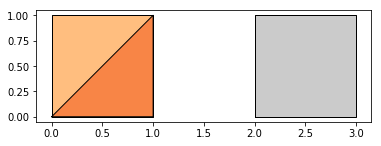

In [37]:
g.plot()

In [39]:
print(g.area)

0    0.5
1    1.0
2    1.0
dtype: float64


In [43]:
g.buffer(0.5)

0    POLYGON ((-0.3535533905932737 0.35355339059327...
1    POLYGON ((-0.5 0, -0.5 1, -0.4975923633360985 ...
2    POLYGON ((1.5 0, 1.5 1, 1.502407636663901 1.04...
dtype: object

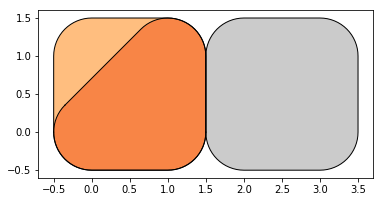

In [44]:
g.buffer(0.5).plot()

### Get the Philippines

In [18]:
x = world.name

In [19]:
y = [ph for ph in x if 'Phil' in ph]

In [20]:
y

['Philippines']